In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import numpy as np  
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay, r2_score, median_absolute_error, max_error, mean_absolute_error, f1_score, precision_score
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


C:\Users\User\AppData\Local\Temp\ipykernel_2988\522487349.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(df['bmi'].mean(), inplace=True)
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:183: UserWarning: [18:26:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost:
               precision    recall  f1-score   support

           0       0.94      0.99      0.97       960
           1       0.42      0.08      0.14        62

    accuracy                           0.94      1022
   macro avg       0.68      0.54      0.55      1022
weighted avg       0.91      0.94      0.92      1022

age: 0.1923
heart_disease: 0.1326
ever_married: 0.1245
hypertension: 0.0855
bmi: 0.0855
avg_glucose_level: 0.0845
work_type: 0.0818
gender: 0.0775
smoking_status: 0.0717
Residence_type: 0.0640


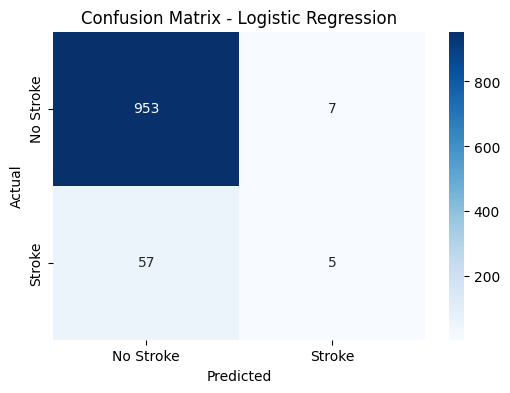

In [12]:
from xgboost import XGBClassifier
df = pd.read_csv("healthcare-dataset-stroke-data.csv")

df.drop(['id'], axis=1, inplace=True)

df['bmi'].fillna(df['bmi'].mean(), inplace=True)

non_numeric_columns = df.select_dtypes(include=['object']).columns
non_numeric_columns

label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])
df['ever_married'] = label_encoder.fit_transform(df['ever_married'])
df['work_type'] = label_encoder.fit_transform(df['work_type'])
df['Residence_type'] = label_encoder.fit_transform(df['Residence_type'])
df['smoking_status'] = label_encoder.fit_transform(df['smoking_status'])


X = df.drop('stroke', axis=1)
y = df['stroke']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

print("XGBoost:\n", classification_report(y_test, y_pred))

feature_names = X.columns  
importances = xgb.feature_importances_

for name, importances in sorted(zip(feature_names, importances), key=lambda x: abs(x[1]), reverse=True):
    print(f"{name}: {importances:.4f}")

cm = confusion_matrix(y_test, y_pred)
labels = ['No Stroke', 'Stroke']

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_2988\261665691.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(df['bmi'].mean(), inplace=True)
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:183: UserWarning: [19:05:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95       960
           1       0.18      0.18      0.18        62

    accuracy                           0.90      1022
   macro avg       0.56      0.56      0.56      1022
weighted avg       0.90      0.90      0.90      1022

age: 0.1521
Residence_type: 0.1236
ht_hd: 0.1177
work_type: 0.1012
ever_married: 0.0911
gender: 0.0903
heart_disease: 0.0808
hypertension: 0.0741
age_bmi: 0.0569
smoking_status: 0.0438
avg_glucose_level: 0.0370
bmi: 0.0314


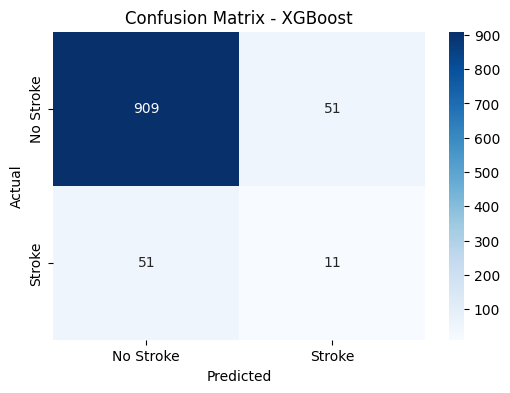

In [21]:
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
df = pd.read_csv("healthcare-dataset-stroke-data.csv")

df.drop(['id'], axis=1, inplace=True)
df['bmi'].fillna(df['bmi'].mean(), inplace=True)
df['age_bmi'] = df['age'] * df['bmi']
df['ht_hd'] = df['hypertension'] * df['heart_disease']


label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])
df['ever_married'] = label_encoder.fit_transform(df['ever_married'])
df['work_type'] = label_encoder.fit_transform(df['work_type'])
df['Residence_type'] = label_encoder.fit_transform(df['Residence_type'])
df['smoking_status'] = label_encoder.fit_transform(df['smoking_status'])


X = df.drop('stroke', axis=1)
y = df['stroke']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train_resampled, y_train_resampled)
y_pred = xgb.predict(X_test)

print("XGBoost:\n", classification_report(y_test, y_pred))

feature_names = X.columns  
importances = xgb.feature_importances_

for name, importances in sorted(zip(feature_names, importances), key=lambda x: abs(x[1]), reverse=True):
    print(f"{name}: {importances:.4f}")

cm = confusion_matrix(y_test, y_pred)
labels = ['No Stroke', 'Stroke']

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - XGBoost')
plt.show()